# TP1: MLP For Classification

*By Daniel Deutsch*

# Lab / MLP for classification / pytorch

For any remark or suggestion, please feel free to contact me at:
geoffroy.peeters@telecom-paristech.fr

Last edit: 2019/06/13

## Objective:

The objective of this lab is to develop a two hidden layers MLP to perform image **classification**.
We will use MNIST for the image dataset.

While image classification, is usually performed using ConvNet, here we will flatten the input images to vectors which then allows us to use a ```fully-connected``` network (FC a.k.a MLP).

- The input images are of size 28*28 and are converted to vectors of size 784. 

- The two hidden layers have 500 and 256 units each and ```Relu```activations.

- The output are the 10 classes. Since we are dealing with a muti-class problem (10 classes), the output activations is therefore a ```softmax```.

Since we are dealing with a multi-class problem (10 classes), we will minimize as loss the ```cross-entropy``` (named negative-log-likelihood ```nll_loss```in pytorch).
Since ```nll_loss```does not contains the ```log``` we will add it directly to the softmax by using the ```log_softmax```as output activation of our network.

As in the the previous lab, the optimizer is a SGD (```optim.SGD```) with a learning rate of 0.01. We will add a ```momentum``` of 0.9.

## Data

We will test our system on the MNIST dataset/
Pytorch comes with a bundle of nice package to load, split into train-and-test, process datasets of images.
We will us ```datasets.MNIST```to load the train and test data.
We will transform them on the fly 
- 1) to tensors (using ```transform.Compose``` and ```transforms.ToTensor()```) 
- 2) normalize them to zero mean and unit standard deviation them on the fly (using ```transform.Compose``` and ```transforms.Normalize()```).

We then convert our datasets (train and test) to ```DataLoader``` that are directly used as iterator during the iterations (it DataLoader manage directly the mini-batch and shuffling).

In the present lab, we distinguish between train and test data. 
We therefore 
- write a train function to learn the network parameters on the train data and 
- write a test function to evaluate the network's performances on the test data.


## Your task:

You need to add the missing parts in the code (parts between ```# --- START CODE HERE``` and ```# --- END CODE HERE```)

## Documentation:
- NN: https://pytorch.org/docs/stable/nn.html
- Autograd: https://pytorch.org/docs/stable/autograd.html
- Optim: https://pytorch.org/docs/stable/optim.html


In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

In [2]:
# --- START CODE HERE
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize(0, 1)])
train_set = datasets.MNIST("./datasets/classification/trainset", download=True, train=True, transform=transform)
train_loader = torch.utils.data.DataLoader(train_set, batch_size=64, shuffle=True)
test_set = datasets.MNIST('./datasets/classification/testset', download=True, train=False, transform=transform)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=64, shuffle=True)
# --- END CODE HERE

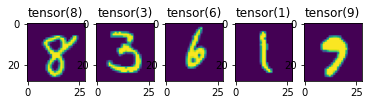

In [3]:
# ------------------------------------
for num in range(0,5):
    one_data = next(iter(train_loader))
    plt.subplot(1,5,num+1)
    plt.imshow(one_data[0][0][0,:,:])
    plt.title(one_data[1][0])

In [4]:
class Net(nn.Module):
    def __init__(self):
        n_in = 28*28
        n_h1 = 500
        n_h2 = 256
        n_out = 10
        super(Net, self).__init__()
        # --- START CODE HERE
        self.model = nn.Sequential(
            nn.Linear(n_in, n_h1),
            nn.ReLU(),
            nn.Linear(n_h1, n_h2),
            nn.ReLU(),
            nn.Linear(n_h2, n_out)
        )
        # --- END CODE HERE

    def forward(self, x):
        # --- START CODE HERE
        x = x.view(-1, 28 * 28)
        x = self.model(x)
        # --- END CODE HERE
        return F.log_softmax(x, dim=1)

In [5]:
def train(model, train_loader, optimizer, epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        # --- START CODE HERE
        optimizer.zero_grad()
        output = model(data)
        loss = F.nll_loss(output, target)
        loss.backward()
        optimizer.step()
        # --- END CODE HERE
        
        if batch_idx % 100 == 0:
            print('epoch {}, loss {}'.format(epoch, loss.data.item()))

In [6]:
def test(model, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            # --- START CODE HERE
            output = model(data)
            test_loss += F.nll_loss(output, target, reduction='sum').item()
            pred = output.argmax(dim=1, keepdim=True)
            correct += pred.eq(target.view_as(pred)).sum().item()
    test_accuracy = correct
            # --- STOP CODE HERE
        
    test_loss /= len(test_loader.dataset)
    test_accuracy /= len(test_loader.dataset)
    print('\nTest set: Average loss: {}, Accuracy: {}\n'.format(test_loss, test_accuracy))

In [7]:
model = Net()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
nb_epoch = 10
for epoch in range(1, nb_epoch + 1):
    # --- START CODE HERE
    train(model, train_loader, optimizer, epoch)
    test(model, test_loader)
    # --- END CODE HERE

epoch 1, loss 2.2990503311157227
epoch 1, loss 0.9642525315284729
epoch 1, loss 0.36527758836746216
epoch 1, loss 0.4565790891647339
epoch 1, loss 0.28909942507743835
epoch 1, loss 0.20584475994110107
epoch 1, loss 0.24881334602832794
epoch 1, loss 0.18649502098560333
epoch 1, loss 0.4691721200942993
epoch 1, loss 0.2577193081378937

Test set: Average loss: 0.21345662369728088, Accuracy: 0.9393

epoch 2, loss 0.11086182296276093
epoch 2, loss 0.13899658620357513
epoch 2, loss 0.16897869110107422
epoch 2, loss 0.1358228325843811
epoch 2, loss 0.2895035743713379
epoch 2, loss 0.31254976987838745
epoch 2, loss 0.07820557057857513
epoch 2, loss 0.13055522739887238
epoch 2, loss 0.07844776660203934
epoch 2, loss 0.14554136991500854

Test set: Average loss: 0.14207426788806915, Accuracy: 0.9588

epoch 3, loss 0.0963238924741745
epoch 3, loss 0.1276179403066635
epoch 3, loss 0.09830173850059509
epoch 3, loss 0.1837984025478363
epoch 3, loss 0.16272099316120148
epoch 3, loss 0.0680386275053024